In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from sympy.calculus.util import Interval, minimum, maximum, continuous_domain
import matplotlib.ticker as mtick
import warnings

In [2]:
# FUNCTIONS IN FUNCS VARIABLE WILL BE PLOTTED LATER.
# FUNCS ELEMENT SYNTAX: (sympy function, x-axis limits, y-axis limits)
x = sympy.Symbol("x")
funcs = [(x*(1-x), [-4,4], [-4,4]),
         (x**2, [-2,2], [-5,5]),
         (x**3, [-2,2], [-5,5]),
         (1/x, [-5,5], [-2,2]),
         (1/(x**2), [-2,2], [-2,2]),
         (1/(x**20), [-2,2], [-2,2]),
         (1/(1+x**2), [-2,2], [-2,2]),
         (1/(1+x**20), [-2,2], [-2,2]),
         (sympy.log(x), [-4,4], [-4,4]),
         (sympy.exp(x), [-1,1], [-2,2]),
         (1/(1+sympy.exp(x)), [-2,2], [-1,1]),
         (sympy.tanh(x), [-2,2], [-2,2]),
         (sympy.cosh(x), [-2,2], [-2,2]),
         (1/sympy.cosh(x), [-2,2], [-2,2]),
         (sympy.sinc(x), [-10,10], [-2,2]),
         (sympy.erf(x), [-2,2], [-2,2])
         ]

In [3]:
# FIGURE OUTPUT PARAMETERS
plt.rcParams['figure.dpi'] = 80
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5,5)

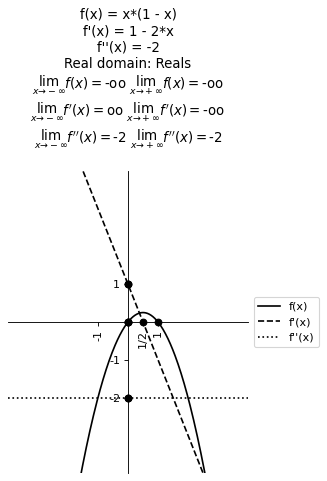

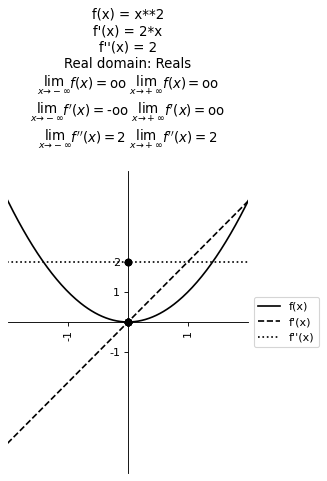

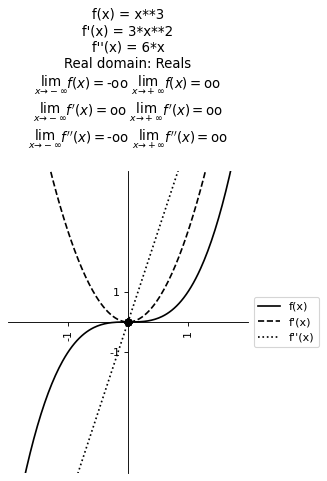

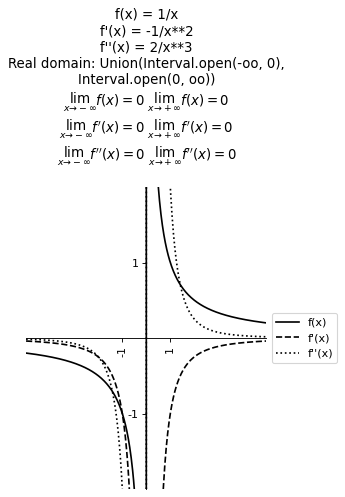

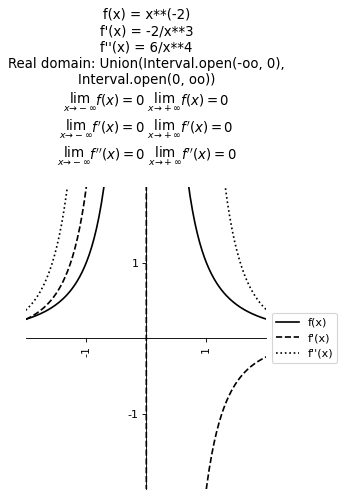

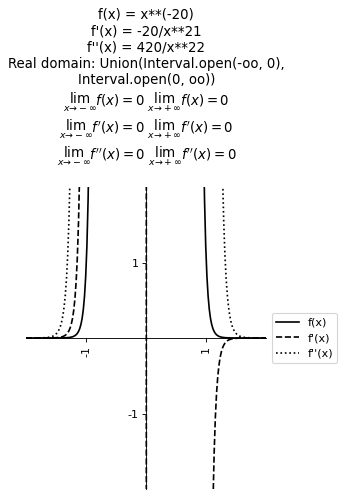

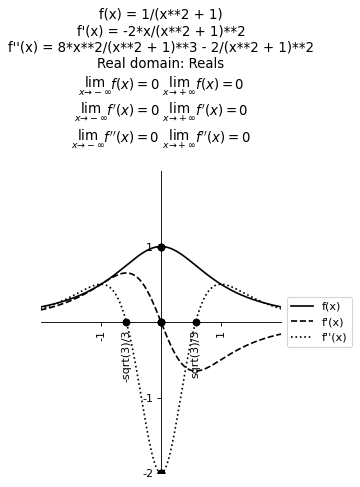

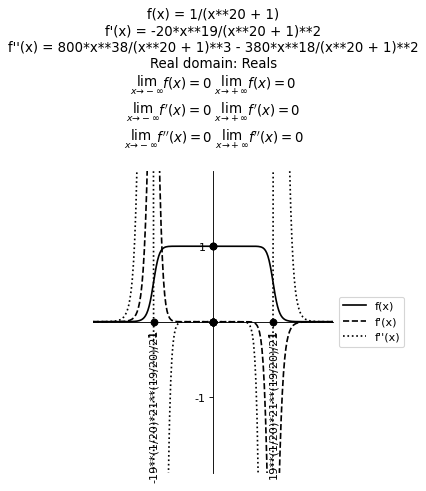

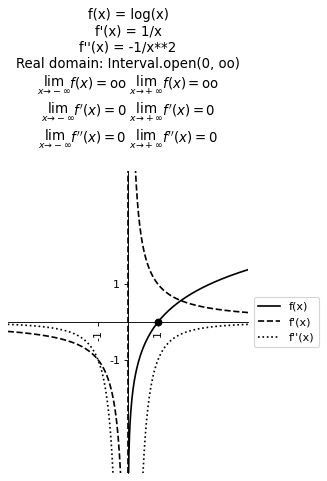

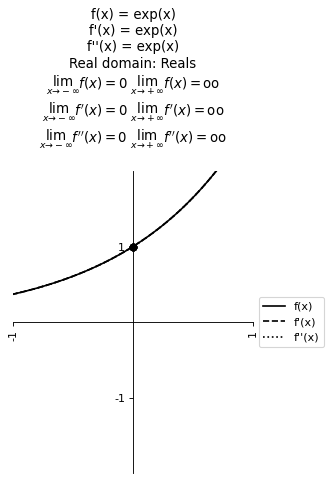

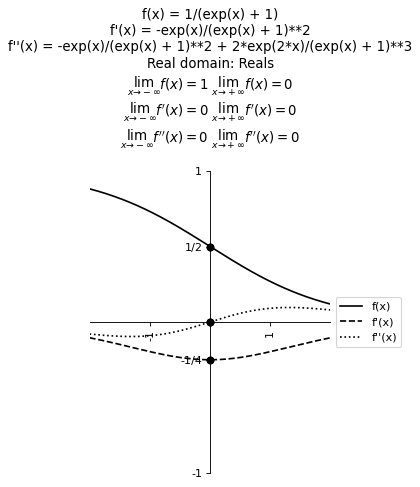

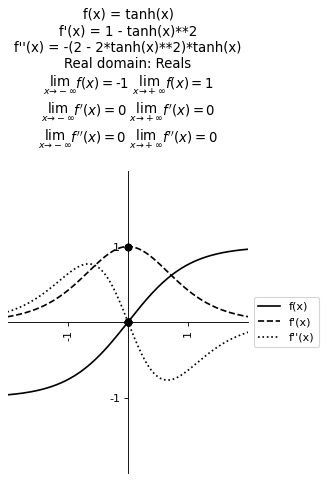

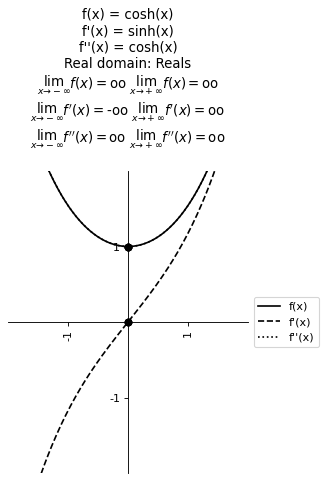

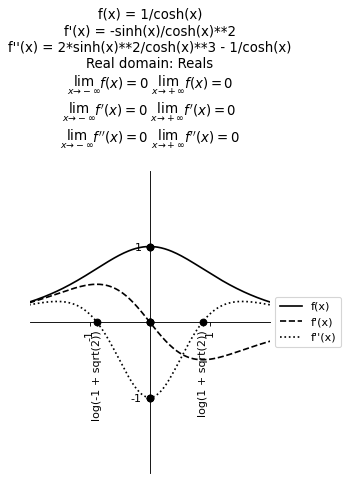

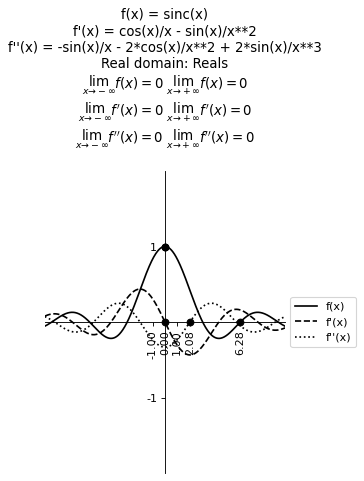

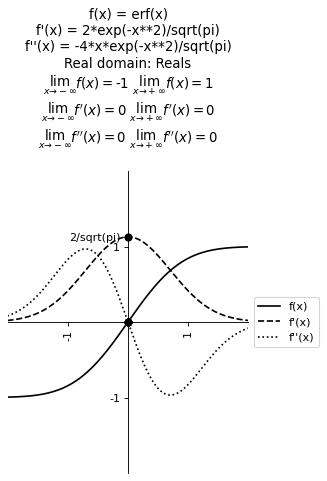

In [4]:
warnings.filterwarnings('ignore')
for func, xlim, ylim in funcs:
    f1 = sympy.diff(func)
    f2 = sympy.diff(f1)
    xx = np.linspace(-100, 100, 10000)
    yy = sympy.lambdify(x, [func, f1, f2])(xx)
    
    try:
        x_intercept_func = sympy.solve(func)
        roundUpTwoDecimals = False
    except:
        x_intercept_func = sympy.nsolve(func, 0.5)
        roundUpTwoDecimals = True
        
    y_intercept_func = func.subs({"x":0})
    try:
        x_intercept_f1 = sympy.solve(f1)
    except:
        x_intercept_f1 = sympy.nsolve(f1, 0.5)
    y_intercept_f1 = f1.subs({"x":0})
    try:
        x_intercept_f2 = sympy.solve(f2)
    except:
        x_intercept_f2 = sympy.nsolve(f2, 0.5)
    y_intercept_f2 = f2.subs({"x":0})
    
    fig = plt.figure()   
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    
    if type(yy[0]) != np.ndarray:
        yy[0] = np.array([yy[0] for el in xx])
    if type(yy[1]) != np.ndarray:
        yy[1] = np.array([yy[1] for el in xx])
    if type(yy[2]) != np.ndarray:
        yy[2] = np.array([yy[2] for el in xx])
    
    ax.plot(xx,yy[0], "k")
    ax.plot(xx,yy[1], "k--")
    ax.plot(xx,yy[2], "k:")

    xticks = [(1,"1"),
             (-1,"-1")]
                
    yticks = [(1,"1"),
             (-1,"-1")]
    IVL = Interval(xlim[0],xlim[1])
    
    for y_intercept, x_intercept in zip([y_intercept_func, y_intercept_f1, y_intercept_f2],
                                        [x_intercept_func, x_intercept_f1, x_intercept_f2]
                                       ):
        try:
            mi = minimum(y_intercept, x, IVL)
            yticks.append((mi, str(mi)))
        except ValueError:
            pass

        try:
            ma = maximum(y_intercept, x, IVL)
            yticks.append((ma, str(ma)))
        except ValueError:
            pass


    
        if not type(y_intercept) == sympy.core.numbers.ComplexInfinity:
            ax.scatter(0, y_intercept, color= 'black')
            if type(y_intercept) != sympy.core.numbers.NaN:
                yticks.append((y_intercept, str(y_intercept)))
                
        if not type(y_intercept) == sympy.core.numbers.ComplexInfinity:
            ax.scatter(0, y_intercept, color= 'black')
            if type(y_intercept) != sympy.core.numbers.NaN:
                yticks.append((y_intercept, str(y_intercept)))

        
        if type(x_intercept) != list:
            x_intercept = [x_intercept]
            
        for xi in x_intercept:
            if xi.is_real:
                xticks.append((xi, str(xi)))
                ax.scatter(xi, 0, color= 'black')
        
    xticks = list(set(xticks))
    yticks = list(set(yticks))

    if (0,"0") in xticks:
        xticks.remove((0,"0"))
    if (0,"0") in yticks:
        yticks.remove((0,"0"))
 
    xticks_pos, xticks_lbl = zip(*xticks)
    yticks_pos, yticks_lbl = zip(*yticks)
    
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels(xticks_lbl)
    ax.set_yticks(yticks_pos)
    ax.set_yticklabels(yticks_lbl)
         
    
    ax.legend(["f(x)",
              "f'(x)",
              "f''(x)"],
              loc='center left', bbox_to_anchor=(1, 0.5))

    txt="f(x) = "+func.__str__()+"\n"+\
        "f'(x) = "+f1.__str__()+"\n"+\
        "f''(x) = "+f2.__str__()+"\n"+\
        "Real domain: "+str(continuous_domain(func, x, sympy.S.Reals)).replace(", Interval",",\nInterval")+"\n"+\
        r"$\lim_{x \to -\infty} f(x) = $"+str(sympy.limit(func,x,-np.inf))+" "+r"$\lim_{x \to +\infty} f(x) = $"+str(sympy.limit(func,x,np.inf))+"\n"+\
        r"$\lim_{x \to -\infty} f'(x) = $"+str(sympy.limit(f1,x,-np.inf))+" "+r"$\lim_{x \to +\infty} f'(x) = $"+str(sympy.limit(f1,x,np.inf))+"\n"+\
        r"$\lim_{x \to -\infty} f''(x) = $"+str(sympy.limit(f2,x,-np.inf))+" "+r"$\lim_{x \to +\infty} f''(x) = $"+str(sympy.limit(f2,x,np.inf))+"\n"

    if roundUpTwoDecimals:
        ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    
    plt.title(txt)
    plt.subplots_adjust(left=0.3)
    plt.xticks(rotation=90)

In [5]:
# Exported to PDF from terminal with
# jupyter nbconvert --to webpdf --allow-chromium-download --TemplateExporter.exclude_input=True functions_plot.ipynb